## Build, Train and Evaluate a CNN for Image classification on the MNIST or CIFAR-10 dataset using Tensorflow and Keras

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


Load CIFAR-10 dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Normalize the data

In [4]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [14]:
# Check original label shapes before encoding
print(f'Original y_train shape: {y_train.shape}')  # (50000, 1)

Original y_train shape: (50000, 10)


One hot encode the labels

In [5]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
# Reshape y_train and y_test to remove the extra dimension
y_train = y_train.reshape(y_train.shape[0], y_train.shape[2])
y_test = y_test.reshape(y_test.shape[0], y_test.shape[2])

In [6]:
print(f'Training data shape: {X_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


Build the CNN model

In [7]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [10]:
print(y_train.shape)


(50000, 10)


In [11]:
history=model.fit(X_train, y_train,
                  epochs=10,
                  batch_size=64,
                  validation_split=0.2
                  )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.3050 - loss: 1.8798 - val_accuracy: 0.5235 - val_loss: 1.3579
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.4882 - loss: 1.4189 - val_accuracy: 0.5872 - val_loss: 1.1812
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.5583 - loss: 1.2421 - val_accuracy: 0.6193 - val_loss: 1.0930
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.5934 - loss: 1.1424 - val_accuracy: 0.6429 - val_loss: 1.0125
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.6211 - loss: 1.0743 - val_accuracy: 0.6483 - val_loss: 0.9883
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.6461 - loss: 1.0068 - val_accuracy: 0.6584 - val_loss: 0.9556
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.6590 - loss: 0.9632 - val_accuracy: 0.6750 - val_loss: 0.9370
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6753 - loss: 0.9193 - 

Evaluate on test dataset

In [12]:
test_loss, test_accuracy=model.evaluate(X_test,y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6943 - loss: 0.8653
Test accuracy: 0.6913999915122986


Visualize the training


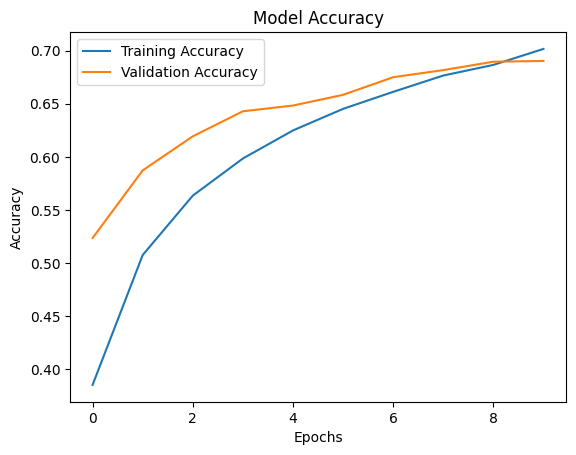

In [16]:
import matplotlib.pyplot as plt

#plot accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

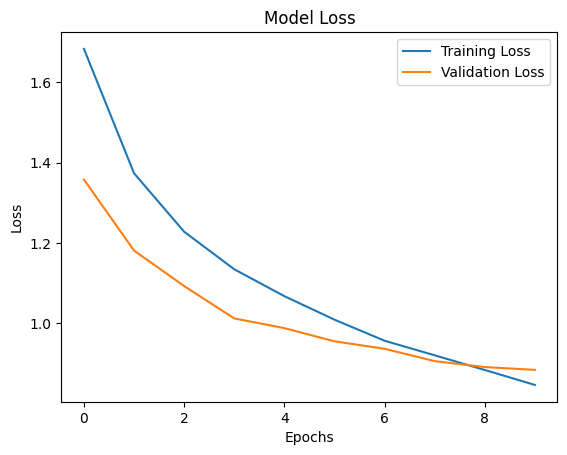

In [18]:
#plot loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()